#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles.

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [102]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [103]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

/usr/local/bin:/Users/macbookair/Library/Python/3.12/bin:/opt/anaconda3/bin:/opt/anaconda3/condabin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/Library/Frameworks/Python.framework/Versions/3.11/bin:/Library/Frameworks/Python.framework/Versions/3.10/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/opt/anaconda3/bin:/opt/anaconda3/condabin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/Library/Frameworks/Python.framework/Versions/3.11/bin:/Library/Frameworks/Python.framework/Versions/3.10/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/co

In [130]:
import awkward,uproot
import numpy as np
import matplotlib.pylab as plt


All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

I commented it out as I used the file data that I downloaded manually.

In [105]:
#import wget
#url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root'
#download=wget.download(url)
#!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
# If we ALL do this too often, CERN will block our IP address....

In [106]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open("/Users/macbookair/Downloads/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [107]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [108]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

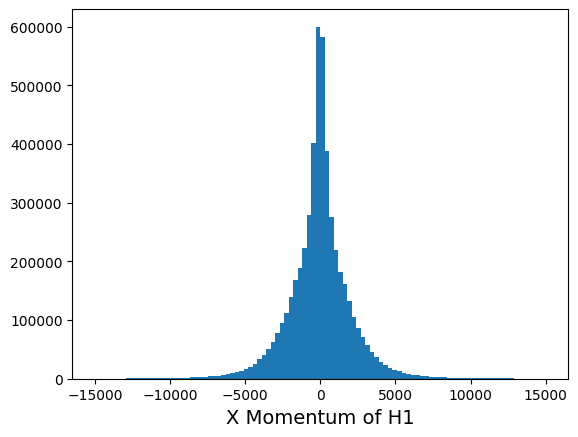

In [109]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

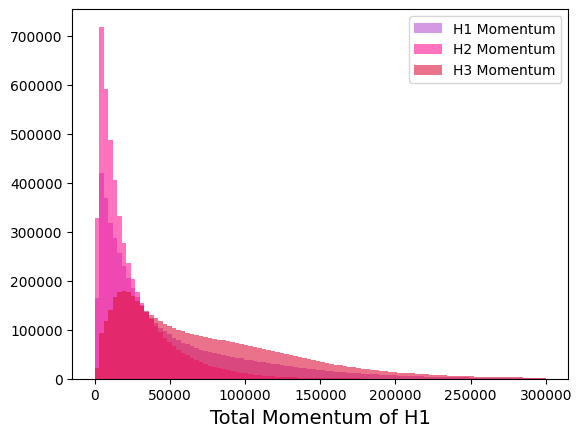

In [600]:
#Here make a plot of the Total momentum of each of the three daughters
#First is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()
H2_PX=Events['H2_PX'].array()
H2_PY=Events['H2_PY'].array()
H2_PZ=Events['H2_PZ'].array()
H3_PX=Events['H3_PX'].array()
H3_PY=Events['H3_PY'].array()
H3_PZ=Events['H3_PZ'].array()

# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
H1_Ptot=np.sqrt(H1_PX**2+H1_PY**2+H1_PZ**2)
H2_Ptot=np.sqrt(H2_PX**2+H2_PY**2+H2_PZ**2)
H3_Ptot=np.sqrt(H3_PX**2+H3_PY**2+H3_PZ**2)

# plot
plt.figure();
plt.hist (H1_Ptot, bins=100, range=(0,300000), color='mediumorchid', alpha=0.6, label = 'H1 Momentum'); #Make physics pink again
plt.hist (H2_Ptot, bins=100, range=(0,300000), color='deeppink', alpha=0.6, label = 'H2 Momentum'); #Make physics pink again
plt.hist (H3_Ptot, bins=100, range=(0,300000), color='crimson', alpha=0.6, label = 'H3 Momentum'); #Make physics pink again
plt.xlabel('Total Momentum of H1', fontsize=14);
plt.legend ()
plt.show ()

In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

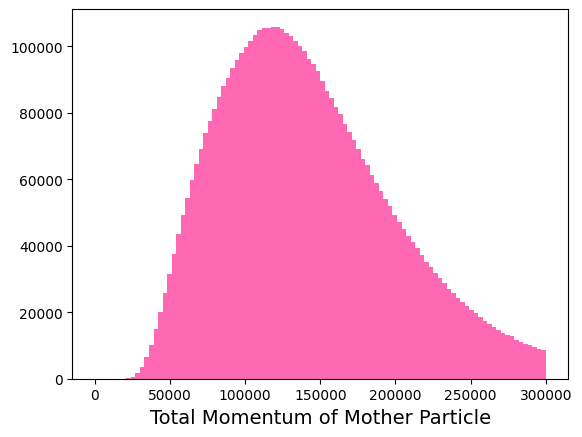

In [261]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...

# B stands for the meson, motherparticle (as Btot was proposed, I also went with B)
B_PX=H1_PX + H2_PX + H3_PX
B_PY=H1_PY + H2_PY + H3_PY
B_PZ=H1_PZ + H2_PZ + H3_PZ
B_Ptot=np.sqrt(B_PX**2 + B_PY**2 + B_PZ**2) # total momentum for meson

# the plot for the momentum of the motherpartcile
plt.figure()
plt.hist(B_Ptot, bins=100, range=(0, 300000), color='hotpink') #I used the same range here as in the previous one for clarity of comparison
plt.xlabel('Total Momentum of Mother Particle', fontsize=14)
plt.show()

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [112]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches=Events.arrays()

# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()

# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[45].items():
    print ("%s  :  %s"%(branch, value))

Event number #45
-------------------
B_FlightDistance  :  257.00205776946603
B_VertexChi2  :  1.865567179221614
H1_PX  :  420.3413896413646
H1_PY  :  -110.66276079201207
H1_PZ  :  5883.766388082404
H1_ProbK  :  0.012183159589767456
H1_ProbPi  :  0.8191394209861755
H1_Charge  :  -1
H1_IPChi2  :  27121.53690741779
H1_isMuon  :  1
H2_PX  :  -985.6367588987478
H2_PY  :  630.9893539299605
H2_PZ  :  35342.13861801284
H2_ProbK  :  0.6670113801956177
H2_ProbPi  :  0.04563945531845093
H2_Charge  :  1
H2_IPChi2  :  13712.438218214942
H2_isMuon  :  0
H3_PX  :  -6242.300384410311
H3_PY  :  -862.2130979651508
H3_PZ  :  277275.49225626234
H3_ProbK  :  0.07501816749572754
H3_ProbPi  :  0.428352952003479
H3_Charge  :  1
H3_IPChi2  :  1026.12298434195
H3_isMuon  :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

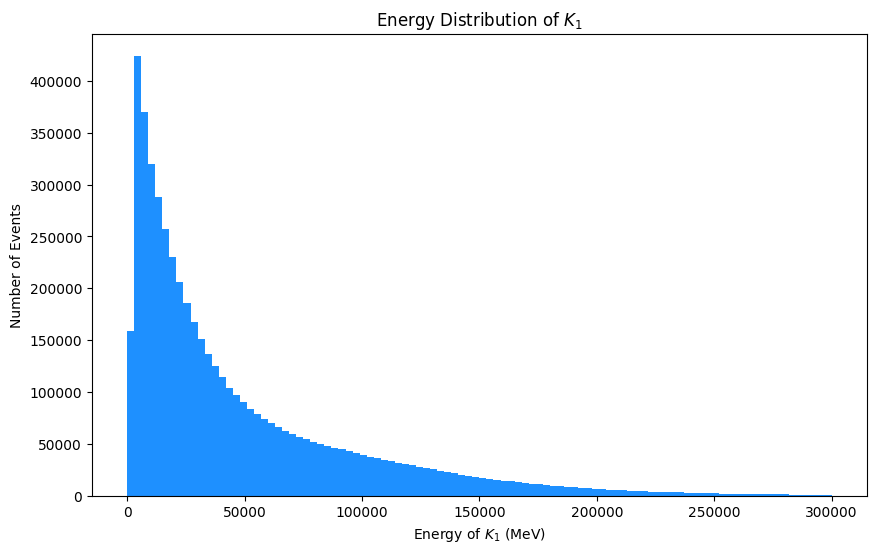

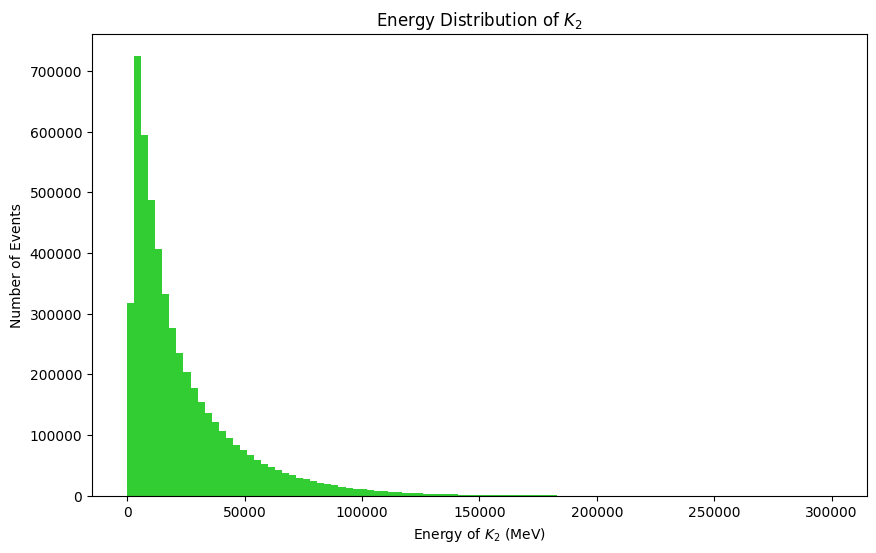

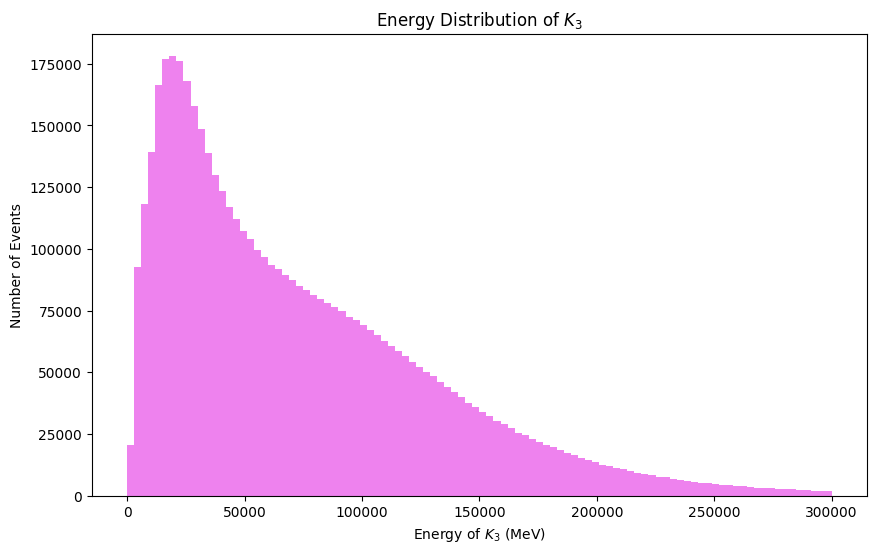

In [665]:
# mass of the Kaon in MeV/c^2, taken from https://pdg.lbl.gov/2020/reviews/rpp2020-rev-charged-kaon-mass.pdf
kaon_mass = 493.677

#for H2 and H3 I'm doing the same Ptot as for H1
H2_Ptot=np.sqrt(H2_PX**2+H2_PY**2+H2_PZ**2)
H3_Ptot=np.sqrt(H3_PX**2+H3_PY**2+H3_PZ**2)

#next, in order to calculate the energy of the kaon, I used the formula provided above for energy
H1_E = np.sqrt(H1_Ptot**2 + kaon_mass**2)
H2_E = np.sqrt(H2_Ptot**2 + kaon_mass**2)
H3_E = np.sqrt(H3_Ptot**2 + kaon_mass**2)


#plot for H1 energies
plt.figure(figsize=(10, 6))
plt.hist(H1_E, bins=100, range=(0,300000), color='dodgerblue')
plt.xlabel('Energy of $K_1$ (MeV)')
plt.ylabel('Number of Events')
plt.title('Energy Distribution of $K_1$')
plt.show()

#plot for H2 energies
plt.figure(figsize=(10, 6))
plt.hist(H2_E, bins=100, range=(0,300000), color='limegreen')
plt.xlabel('Energy of $K_2$ (MeV)')
plt.ylabel('Number of Events')
plt.title('Energy Distribution of $K_2$')
plt.show()

#plot for H3 energies
plt.figure(figsize=(10, 6))
plt.hist(H3_E, bins=100, range=(0,300000), color='violet')
plt.xlabel('Energy of $K_3$ (MeV)')
plt.ylabel('Number of Events')
plt.title('Energy Distribution of $K_3$')
plt.show()


We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

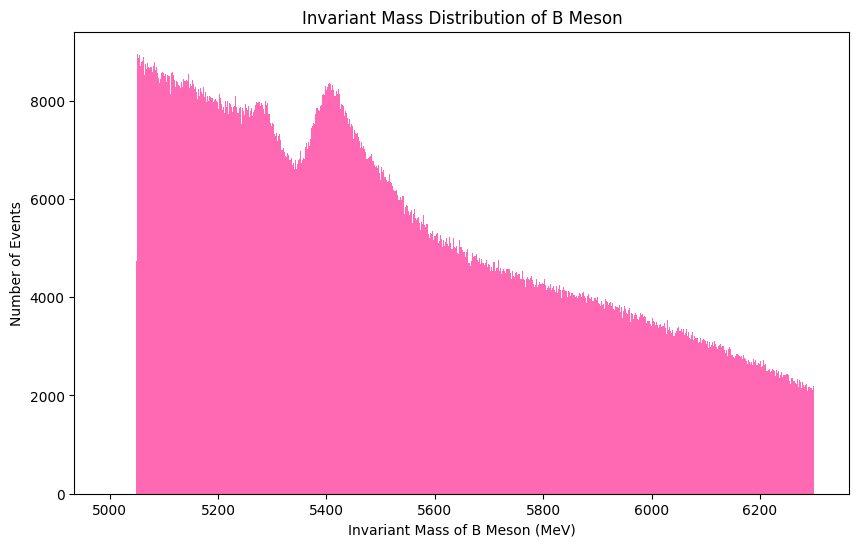

In [262]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters

#Now plot a histogram of the range of masses of the B meson.

#Does this match what we would expect from theory?

#Hint - look it up

#the total energy of the mother
B_E = H1_E + H2_E + H3_E

#the invariant mass of the mother
B_M = np.sqrt(B_E**2 - B_Ptot**2)

#the plot for the mass range
plt.figure(figsize=(10, 6))
plt.hist(B_M, bins=1000, range=(5000, 6300), color='hotpink') #the choice of range and number of bin done with the help of Merovee
plt.xlabel('Invariant Mass of B Meson (MeV)')
plt.ylabel('Number of Events')
plt.title('Invariant Mass Distribution of B Meson')
plt.show()

#after checking with my groupmates and Chris, I was told that is how it should look like. It does not match theory!
#the average mass is 5279.34±0.12 MeV/c2 (https://en.wikipedia.org/wiki/B_meson)

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

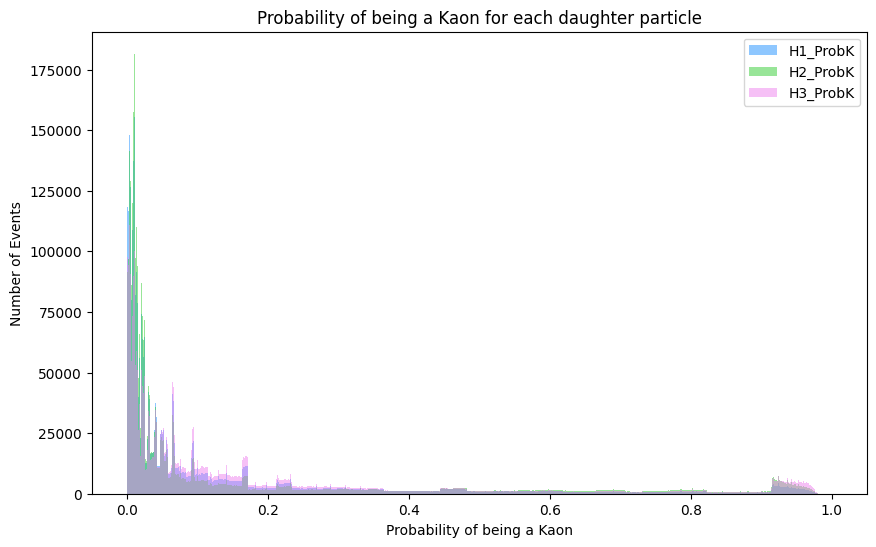

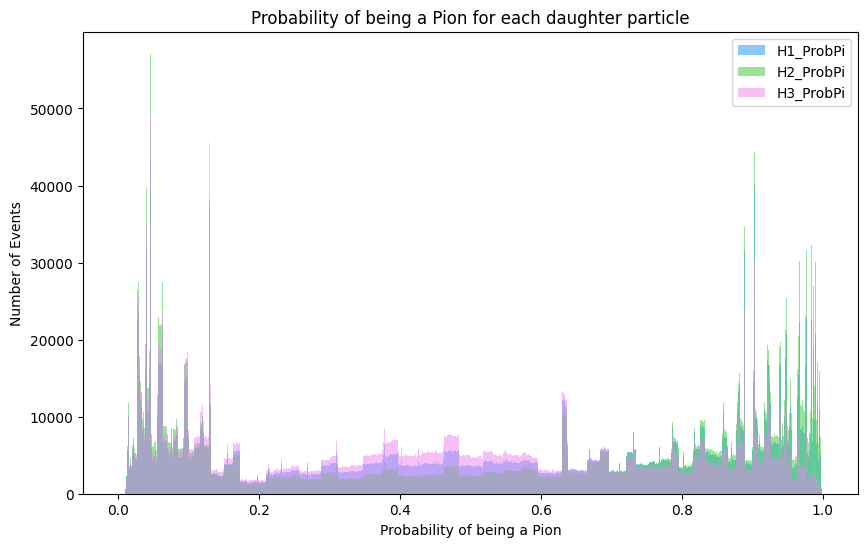

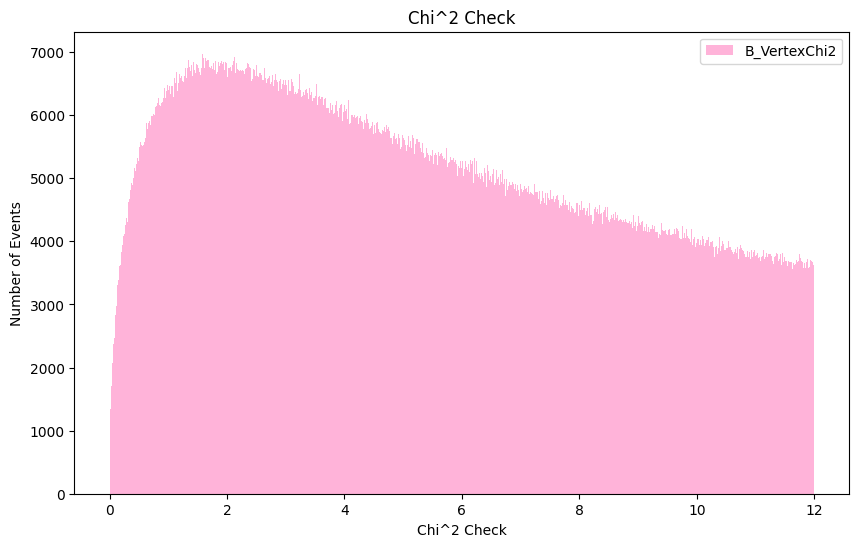

In [263]:
# Plot any other variables from the list above you think would be handy to use in a selection...

#plots of H1/H2/H3 _ProbK 
H1_ProbK = Events['H1_ProbK'].array()
H2_ProbK = Events['H2_ProbK'].array()
H3_ProbK = Events['H3_ProbK'].array()
plt.figure(figsize=(10, 6))
plt.hist(H1_ProbK, bins=1000, range=(0, 1), alpha=0.5, color='dodgerblue', label='H1_ProbK')
plt.hist(H2_ProbK, bins=1000, range=(0, 1), alpha=0.5, color='limegreen', label='H2_ProbK')
plt.hist(H3_ProbK, bins=1000, range=(0, 1), alpha=0.5,  color='violet', label='H3_ProbK')
plt.xlabel('Probability of being a Kaon')
plt.ylabel('Number of Events')
plt.title('Probability of being a Kaon for each daughter particle')
plt.legend()
plt.show()


#plots of H1/H2/H3 _ProbPi 
H1_ProbPi = Events['H1_ProbPi'].array()
H2_ProbPi = Events['H2_ProbPi'].array()
H3_ProbPi = Events['H3_ProbPi'].array()
plt.figure(figsize=(10, 6))
plt.hist(H1_ProbPi, bins=1000, range=(0, 1), alpha=0.5, color='dodgerblue', label='H1_ProbPi')
plt.hist(H2_ProbPi, bins=1000, range=(0, 1), alpha=0.5, color='limegreen', label='H2_ProbPi')
plt.hist(H3_ProbPi, bins=1000, range=(0, 1), alpha=0.5,  color='violet', label='H3_ProbPi')
plt.xlabel('Probability of being a Pion')
plt.ylabel('Number of Events')
plt.title('Probability of being a Pion for each daughter particle')
plt.legend()
plt.show()

#plot of the B_VertexChi2
B_VertexChi2 = Events['B_VertexChi2'].array()
plt.figure(figsize=(10, 6))
plt.hist(B_VertexChi2, bins=1000, range=(0, 12), alpha=0.5, color='hotpink', label='B_VertexChi2') #range for chi^2 chosen by trial and error, checked with groupmates
plt.xlabel('Chi^2 Check')
plt.ylabel('Number of Events')
plt.title('Chi^2 Check')
plt.legend()
plt.show()

**Using** these plots, we can now think about making a preselection. This has some format like the below:

Here is the selection made for each daughter particle with the probability of being a Kaon being more than 30%, and H1/2/3 to not be a muon. 40% was chosed due to the data output being quite reasonable, and the number of events increased greatly, which is highly important for plotting and further analysis.

In [434]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon, H2 to not be an electron and H3 to be an elephant.
#This is not a good choice of selection - you should make your own :)
#selection=(branches['H1_ProbPi']>0.9) & \ (branches['H2_ProbPi']>0.9) && (branches['H3_ProbPi']>0.9) && (branches['H1_isMuon']!==1 && (branches['H2_isElectron'] == 1 && (branches['H3_isElephant']==1)

#Explanation for the choice provided in the cell above
selection = (branches['H1_ProbK'] > 0.4) & \
            (branches['H2_ProbK'] > 0.4) & \
            (branches['H3_ProbK'] > 0.4) & \
            (branches['H1_isMuon'] == 0) & \
            (branches['H2_isMuon'] == 0) & \
            (branches['H3_isMuon'] == 0)



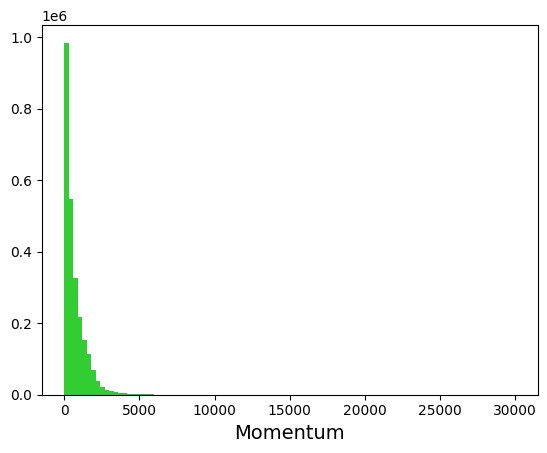

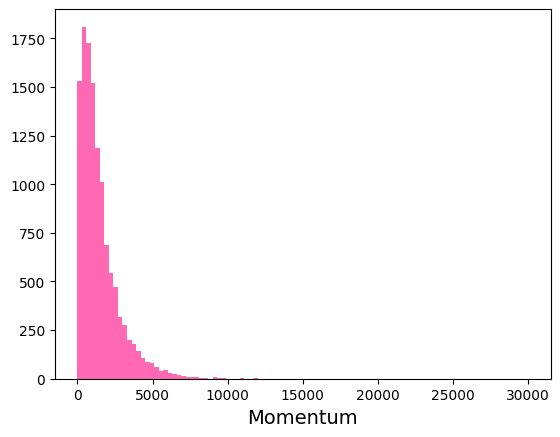

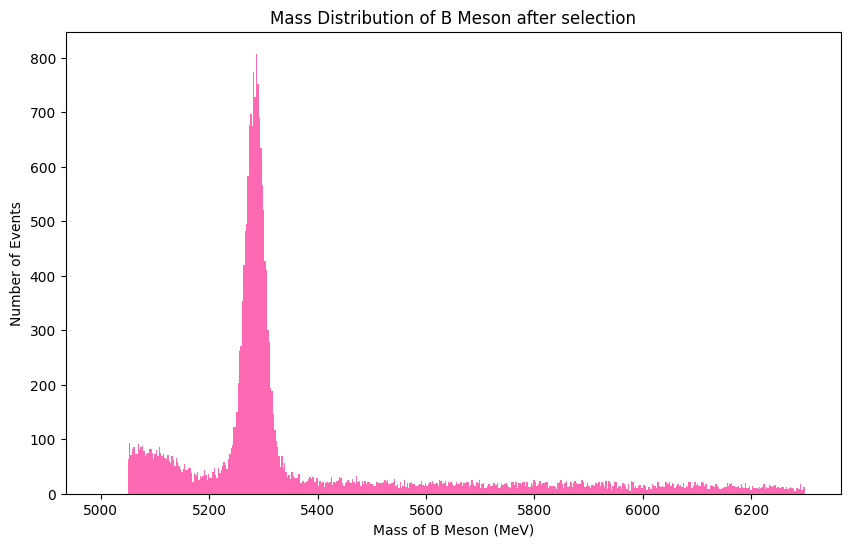

In [666]:
#To apply the selection - we can use the selection command after our instruction e.g.:
selected_branches = branches[selection]

#probably we can make this more generic - try below if you like...
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

# I have decided to manually recalculate the data so we have only the selection here
selected_H1_Ptot = np.sqrt(selected_branches['H1_PX']**2 + selected_branches['H1_PY']**2 + selected_branches['H1_PZ']**2)
selected_H2_Ptot = np.sqrt(selected_branches['H2_PX']**2 + selected_branches['H2_PY']**2 + selected_branches['H2_PZ']**2)
selected_H3_Ptot = np.sqrt(selected_branches['H3_PX']**2 + selected_branches['H3_PY']**2 + selected_branches['H3_PZ']**2)

selected_H1_E = np.sqrt(selected_H1_Ptot**2 + kaon_mass**2)
selected_H2_E = np.sqrt(selected_H2_Ptot**2 + kaon_mass**2)
selected_H3_E = np.sqrt(selected_H3_Ptot**2 + kaon_mass**2)

selected_B_PX = selected_branches['H1_PX'] + selected_branches['H2_PX'] + selected_branches['H3_PX']
selected_B_PY = selected_branches['H1_PY'] + selected_branches['H2_PY'] + selected_branches['H3_PY']
selected_B_PZ = selected_branches['H1_PZ'] + selected_branches['H2_PZ'] + selected_branches['H3_PZ']
selected_B_Ptot = np.sqrt(selected_B_PX**2 + selected_B_PY**2 + selected_B_PZ**2)

selected_B_E = selected_H1_E + selected_H2_E + selected_H3_E
selected_B_M = np.sqrt(selected_B_E**2 - selected_B_Ptot**2)

#Try plotting our H2_PX distribution with and without the selection and spot the differences... -> major difference is in the number of events! Much more precise values now, slighlt wider range
#shortened the range for easier analysis
plt.figure();
plt.hist (H2_PX, bins=100, range=(0,30000), color='limegreen');
plt.xlabel('Momentum', fontsize=14);

plt.figure();
plt.hist (selected_branches['H1_PY'], bins=100, range=(0,30000), color='hotpink');
plt.xlabel('Momentum', fontsize=14);
plt.hist (selected_branches['H1_PY'], bins=100, alpha=0.4, range=(0,3000), color='hotpink');

#plotted the B mass after selection
plt.figure(figsize=(10, 6))
plt.hist(selected_B_M, bins=500, range=(5000, 6300), color='hotpink')
plt.xlabel('Mass of B Meson (MeV)')
plt.ylabel('Number of Events')
plt.title('Mass Distribution of B Meson after selection')
plt.show()
#now it looks so much like the theoretical value stated above!

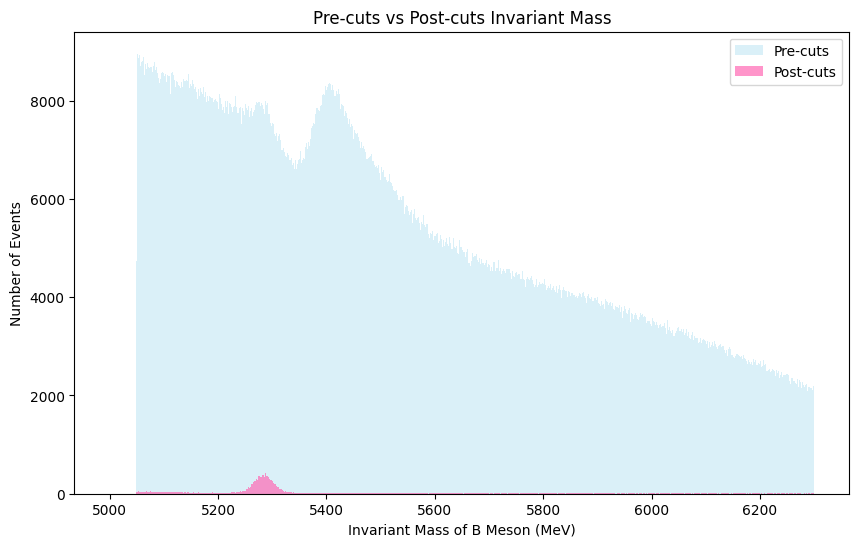

Number of entries before cuts: 5135823
Number of entries after cuts: 24224


In [436]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)
plt.figure(figsize=(10, 6))
plt.hist(B_M, bins=1000, range=(5000, 6300), alpha=0.3, label='Pre-cuts', color='skyblue')
plt.hist(selected_B_M, bins=1000, range=(5000, 6300), alpha=0.7, label='Post-cuts', color='hotpink')
plt.xlabel('Invariant Mass of B Meson (MeV)')
plt.ylabel('Number of Events')
plt.title('Pre-cuts vs Post-cuts Invariant Mass')
plt.legend()
plt.show()

#What do you notice about your histogram now?
#ANSWER: Before, it was shifted to the right, making me think that that's where the interest is. But after the cut and all the pions out, I can see that kaon's prob is actually shifted to the left!

#You can also use len() to find the number of entries in each.
print("Number of entries before cuts:", len(B_M))
print("Number of entries after cuts:", len(selected_B_M))

Before, the probability was ginormous and shofted almost evenly to the right and left, making it seem like that is where the interest  located. However, after the cut, it can clearly be seen that kaon's probability is actually shifted to the left!


# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

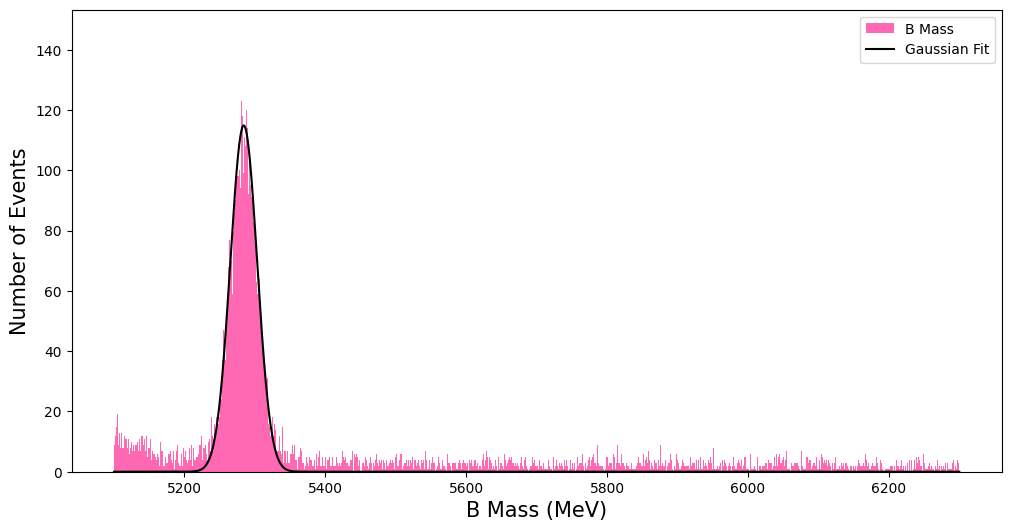

In [619]:
# Grab another package
from scipy.optimize import curve_fit

# Start by defining the variable we are interested in...
B_Mass = selected_B_M

fig, ax = plt.subplots(figsize=(12,6)) 

# we make a plot (plt.hist) and then we extract the bin height and it's edges from the plot...
#changed the range a bit, otherwise the plot was acting out on A_exp parameter
bin_height, bin_edge, _ = ax.hist(B_Mass, bins=3000, range=(5100, 6300), label = "B Mass", color = 'hotpink')

# now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
# done with the help of Phil
x_data = (bin_edge[:-1]+bin_edge[1:]) / 2 
y_data = bin_height

#Create a Gauss function for fitting - nothing needs changing here
def gauss (x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# Get the fitted curve - some things need changing here
optimisedParameters, pcov = curve_fit(gauss, x_data, y_data, p0=[np.max(y_data), np.mean(B_Mass), np.std(B_Mass)])

#note you need to pick some initial parameters in p0= above!
y_fit = gauss(x_data, *optimisedParameters)

# Now do some overlaying in the plotting environment - nothing major needs changing here - just label it well
ax.plot(x_data, y_fit, label='Gaussian Fit', color = 'black')
ax.set_xlabel("B Mass (MeV)", fontsize=15)
ax.set_ylabel("Number of Events", fontsize=15)
ax.legend()
plt.legend()
plt.show()


Optimised Parameters: [ 114.89725119 5284.26056334   19.02371007]
Optimised Parameters: [1.11231999e+02 5.28435996e+03 1.75939321e+01 2.77618287e+04
 6.22533354e+02]


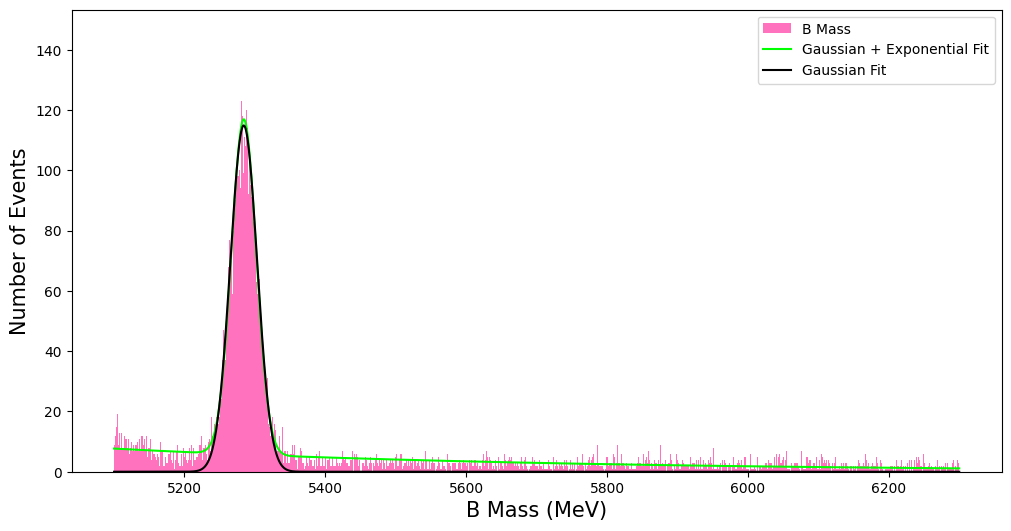

In [636]:
# Explore optimisedParameters - what does it contain?
# optimisedParameters - optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) 
# - ydata is minimized (information taken from https://docs.scipy.org/doc//scipy-1.9.3/reference/generated/scipy.optimize.curve_fit.html)
print("Optimised Parameters:", optimisedParameters)

# subplots
fig, ax = plt.subplots(figsize=(12,6)) 

# which has an exponential shape - and we want to make a combined model to fit which contains both
# we make a plot (plt.hist) and then we extract the bin height and it's edges from the plot...
# changed the range from 5000 to 5100, otherwise the plot was acting out on A_exp parameter
bin_height, bin_edge, _ = ax.hist(B_Mass, bins=3000, range=(5100, 6300), label = "B Mass", color = 'deeppink', alpha = 0.6)

# now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
# done the x data with the help of Phil Notych
x_data = (bin_edge[:-1]+bin_edge[1:]) / 2 
y_data = bin_height

# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background
def combined_fit(x, A_gauss, mu_gauss, sigma_gauss, A_exp, tau_exp):
    gauss_component = A_gauss * np.exp(-(x - mu_gauss)**2 / (2. * sigma_gauss**2))
    exp_component = A_exp * np.exp(-x / tau_exp)
    return gauss_component + exp_component

#The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on
# the parameters use perr =3np.sqrt(np.diag(pcov)). link: https://docs.scipy.org/doc//scipy-1.9.3/reference/generated/scipy.optimize.curve_fit.html
optimisedParameters_combined, pcov_combined = curve_fit(combined_fit, x_data, y_data, p0=[np.max(y_data), np.mean(B_Mass), np.std(B_Mass), np.min(B_Mass), 100])
y_fit_combined = combined_fit(x_data, *optimisedParameters_combined)

print("Optimised Parameters:", optimisedParameters_combined)

#plot
ax.plot(x_data, y_fit_combined, label='Gaussian + Exponential Fit', color = 'lime')
ax.plot(x_data, y_fit, label='Gaussian Fit', color = 'black')
ax.set_xlabel("B Mass (MeV)", fontsize=15)
ax.set_ylabel("Number of Events", fontsize=15)
ax.legend()
plt.legend()
plt.show()

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

I looked into them and decided to try out Chebychev, link to directory about it: https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.Chebyshev.html. 

Information about it can be found: https://en.wikipedia.org/wiki/Chebyshev_polynomials and https://www.geeksforgeeks.org/chebyshev-polynomials/.

Essentially, due to it being a numerical method, which, using Taylor series, approximates the function to get a more even trend. It is defined recursively, meaning each polynomial is built from the previous ones. Chebyshev polynomials oscillate within the interval [-1, 1], or in other words, look as:

$T_n(x) = \cos(n \cos^{-1}(x)), \ \ \  -1 \leq x \leq 1$

They are useful in:

* Approximation, as Chebyshev polynomials provide an optimal way to approximate functions, especially for minimizing errors
* Numerical integration and solving differential equations
* Filter design

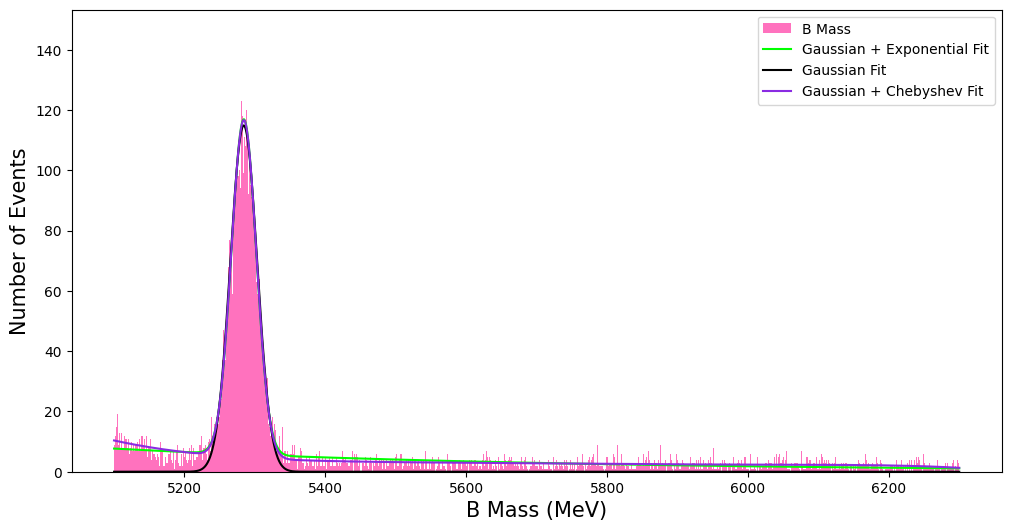

In [667]:


from numpy.polynomial import chebyshev

fig, ax = plt.subplots(figsize=(12, 6))

bin_height, bin_edge, _ = ax.hist(B_Mass, bins=3000, range=(5100, 6300), label="B Mass", color='deeppink', alpha = 0.6)
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data = bin_height

#Gaussian + Chebyshev, gauss as defined before, numpy.polynomial.chebyshev.Chebyshev taken from numpy directory
def gauss_chebyshev_fit(x, A_gauss, mu_gauss, sigma_gauss, *cheb_coeffs):
    gauss_component = A_gauss * np.exp(-(x - mu_gauss)**2 / (2. * sigma_gauss**2))
    cheb_poly = chebyshev.Chebyshev(cheb_coeffs)
    cheb_component = cheb_poly(x)
    return gauss_component + cheb_component

#Chebyshev degree, chosen experemetally by trying various values starting 1
chebyshev_degree = 8

#starts from zero [0]
#Chebyshev polynomial of degree n has n + 1 coefficients, hence + 1
p0 = [np.max(y_data), np.mean(B_Mass), np.std(B_Mass)] + [0] * (chebyshev_degree + 1)
optimisedParameters_cheb, pcov_cheb = curve_fit(gauss_chebyshev_fit, x_data, y_data, p0=p0)

#extract the parameters
A_gauss_fit = optimisedParameters_cheb[0]
mu_gauss_fit = optimisedParameters_cheb[1]
sigma_gauss_fit = optimisedParameters_cheb[2]
cheb_coeffs_fit = optimisedParameters_cheb[3:]

y_fit_cheb = gauss_chebyshev_fit(x_data, *optimisedParameters_cheb)

#plot
ax.plot(x_data, y_fit_combined, label='Gaussian + Exponential Fit', color = 'lime')
ax.plot(x_data, y_fit, label='Gaussian Fit', color = 'black')
ax.plot(x_data, y_fit_cheb, label='Gaussian + Chebyshev Fit', color='blueviolet')
ax.set_xlabel("B Mass (MeV)", fontsize=15)
ax.set_ylabel("Number of Events", fontsize=15)
ax.legend()
plt.legend()
plt.show()

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

The following formulas were used in the calculations:

1. Signal Yield


$ s_y = \frac{A \sigma \sqrt(2\pi)}{max - min} n_{bins} $,


where $s_y$ is the signal yield, $A$ is the amplitude, $\sigma$ is the standard deviation of the gaussian, $max$ and $min$ are the range (from 5100 to 6300) and $n_{bins}$ is the number of bins. 

2. Signal error 

$ \Delta s_y = \sqrt((\frac{\Delta A}{A})^2 + (\frac{\Delta \sigma}{\sigma})^2) s_y$,

3. Background yield

To find the background yield, the signal yield was deducted from the total number of events.

4. Background yield error

$\Delta B = \frac{\Delta \sigma}{\sigma} B$,

where B is background yield.

5. $\chi ^2$ (Link: https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic)

$\chi ^2 = \sum \frac{Y_O - Y_E)^2}{Y_E (L_O-L_E)}$,

where $Y_O$ is the observed data, $Y_E$ is the expected data, $L_O - L_E$ is the degrees of freedom from the length of the observed and expected data difference. 

In [672]:
#number of events in the fit, int to make a whole number as events cannot be just halfway
print('Number of events: ', len(B_Mass))

#the documentation link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
#Those are the optimal events
number_events = optimisedParameters_combined[0] 
events_err = np.sqrt(pcov_combined[0, 0]) 
print(f"Events: {number_events:.2f} ± {events_err:.2f}")

# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background
bins = 3000
max = 6300
min = 5100

#for chi-squared, my laptop commited suicide when i tried to install ROOT, hence I decided to do it different from frame.chiSquare() 
#function to calculate chi-squared
#I decided to stick to reduced chi-sq as the degree of freedom makes the value skyrocket, the value is good if close to 1 
# I found it here: https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic
def calc_chi_squared(observed, expected, params):
    chi_squared = np.sum((observed - expected)**2 / expected)
    dof = len(observed) - len(params)
    red_chi_squared = chi_squared / dof
    return chi_squared, red_chi_squared, dof

#for exponential plot
chi_sqrd, red_chi_sqrd, dof = calc_chi_squared(y_data, y_fit_combined, optimisedParameters_combined)
print(f"\nChi-squared from Exponential: {chi_sqrd:.2f}")
print(f"Degrees of freedom: {dof}") 
print(f"Reduced chi-squared Exponential: {red_chi_sqrd:.2f}")
print('------------------------------')

if 0.5 <= red_chi_sqrd <= 1.5:  #taken from what I understood online would be a good fit range
    print("The fit is reasonable!")
else:
    print("The fit is not the best.")

print('------------------------------')

#for Chebyshev plot
chi_sqrd_c, red_chi_sqrd_c, dof_c = calc_chi_squared(y_data, y_fit_cheb, optimisedParameters_cheb)
print(f"\nChi-squared from Chebyshev: {chi_sqrd_c:.2f}")
print(f"Degrees of freedom: {dof_c}") 
print(f"Reduced chi-squared Chebyshev: {red_chi_sqrd_c:.2f}")
print('------------------------------')

if 0.5 <= red_chi_sqrd_c <= 1.5:  #taken from what I understood online would be a good fit range
    print("The fit is reasonable!")
else:
    print("The fit is not the best.")

print('------------------------------')

#Signal yield
A_fit, mu_fit, sigma_fit, tau_fit = optimisedParameters_combined[:4] 
signal_yield = (A_fit * sigma_fit * np.sqrt(2 * np.pi)) * bins / (max - min)
dA = np.sqrt(pcov_combined[0, 0])
dsigma = np.sqrt(pcov_combined[2, 2])
signal_yield_error = signal_yield * np.sqrt((dA / A_fit)**2 + (dsigma / sigma_fit)**2)
print(f"\nSignal yield: {int(signal_yield)} ± {signal_yield_error:.2f}")

#Background yield (just the difference between total and signal events as I understood it)
background_yield = len(B_Mass) - signal_yield

# Error propagation for background yield
background_yield_error = dsigma / sigma_fit * background_yield

print(f"Background Yield: {int(background_yield)} ± {background_yield_error:.2f}")

Number of events:  24224
Events: 111.23 ± 0.40

Chi-squared from Exponential: 3845.20
Degrees of freedom: 2995
Reduced chi-squared Exponential: 1.28
------------------------------
The fit is reasonable!
------------------------------

Chi-squared from Chebyshev: 3061.20
Degrees of freedom: 2988
Reduced chi-squared Chebyshev: 1.02
------------------------------
The fit is reasonable!
------------------------------

Signal yield: 12263 ± 69.18
Background Yield: 11960 ± 51.57


From here, it can be seen that the fit seems to function quite good so far. The signal yield is roughly half of the total events, with the rest most likely coming from the background. The error bars seem reasonable for both cases. 

Moreover, for the $\chi ^2$ value, the result is very close to 1 at 1.28. It is even better with utilising the Chebyshev polynomial, with $\chi ^2$ at 1.02. This was achieved by taking the reduced  $\chi ^2$, which is evaluated by division of the  $\chi ^2$ by the degrees of freedom value. Henceforth, it is likely to be a reasonable result. 


# Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

*As Chebyshev gave better results, I decided to continue with it.*

Number of events:  24224
B+ events:  12601
B- events:  11623
B- yield: 5868 ± 50.11
B+ yield: 6615 ± 50.29
Asymmetry: -0.06
Uncertainty: 0.01


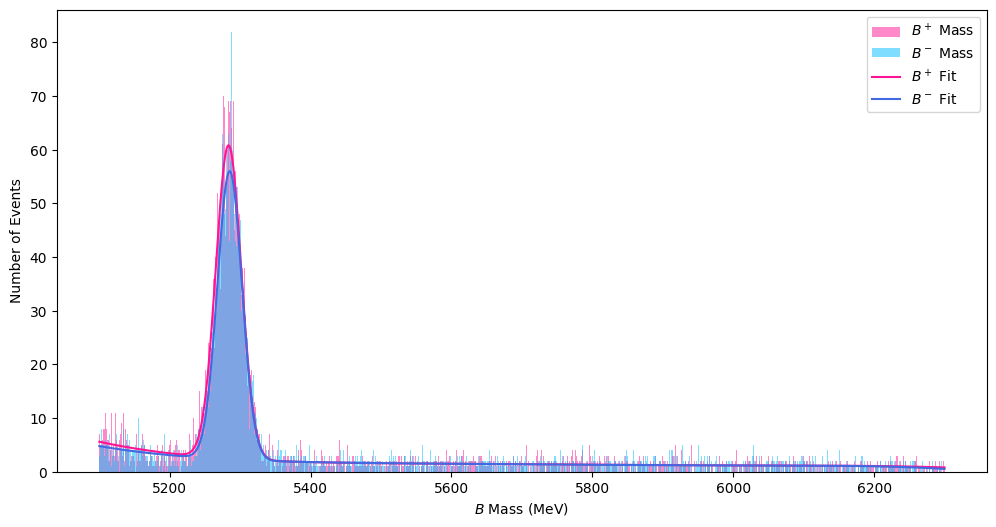

In [675]:
fig, ax = plt.subplots(figsize=(12,6)) 

#did Hx_charge_np with the help of ChatGPT, as I couldn't understand how to do this step
#counts the charges, as stated above
H1_charge_np = awkward.to_numpy(selected_branches['H1_Charge'])
H2_charge_np = awkward.to_numpy(selected_branches['H2_Charge'])
H3_charge_np = awkward.to_numpy(selected_branches['H3_Charge'])

pos_charge = ((H1_charge_np > 0).astype(int) +
(H2_charge_np > 0).astype(int) +
(H3_charge_np > 0).astype(int))

B_minus = (pos_charge == 1)  # B- (1 positive)
B_plus = (pos_charge == 2) # B+ (2 positive)

B_Mass_minus = B_Mass[B_minus]
B_Mass_plus  = B_Mass[B_plus]

#print the number of events 
print("Number of events: ", len(B_Mass))
print("B+ events: ", len(B_Mass_plus))
print("B- events: ", len(B_Mass_minus))

#B+ mass
# similar method as before, but now for particle/antiparticle
bin_height_plus, bin_edge_plus, _ = ax.hist(B_Mass_plus, bins=3000, range=(5100, 6300), label="$B^+$ Mass", color="deeppink", alpha = 0.5)
x_data_plus = (bin_edge_plus[:-1] + bin_edge_plus[1:]) / 2
y_data_plus = bin_height_plus
chebyshev_degree = 8

optimisedParameters_plus, pcov_plus = curve_fit(gauss_chebyshev_fit, x_data_plus, y_data_plus, p0=[np.max(y_data_plus), np.mean(B_Mass_plus), np.std(B_Mass_plus)] + [0] * (chebyshev_degree + 1))
y_fit_plus = gauss_chebyshev_fit(x_data_plus, *optimisedParameters_plus)

#B- mass
bin_height_minus, bin_edge_minus, _ = ax.hist(B_Mass_minus, bins=3000, range=(5100, 6300), label="$B^-$ Mass", color="deepskyblue", alpha = 0.5)
x_data_minus = (bin_edge_minus[:-1] + bin_edge_minus[1:]) / 2
y_data_minus = bin_height_minus

optimisedParameters_minus, pcov_minus = curve_fit(gauss_chebyshev_fit, x_data_minus, y_data_minus, p0=[np.max(y_data_minus), np.mean(B_Mass_minus), np.std(B_Mass_minus)] + [0] * (chebyshev_degree + 1))
y_fit_minus = gauss_chebyshev_fit(x_data_minus, *optimisedParameters_minus)

#Signal yield
A_fit_m, mu_fit_m, sigma_fit_m = optimisedParameters_minus[:3] 
A_fit_p, mu_fit_, sigma_fit_p = optimisedParameters_plus[:3] 
signal_yield_m = (A_fit_m * sigma_fit_m * np.sqrt(2 * np.pi)) * bins / (max - min)
signal_yield_p = (A_fit_p * sigma_fit_p * np.sqrt(2 * np.pi)) * bins / (max - min)
dA_m = np.sqrt(pcov_minus[0, 0])
dA_p = np.sqrt(pcov_plus[0, 0])
dsigma_m = np.sqrt(pcov_minus[2, 2])
dsigma_p = np.sqrt(pcov_plus[2, 2])
signal_yield_error_m = signal_yield_m * np.sqrt((dA_m / A_fit_m)**2 + (dsigma_m / sigma_fit_m)**2)
signal_yield_error_p = signal_yield_p * np.sqrt((dA_p / A_fit_p)**2 + (dsigma_p / sigma_fit_p)**2)
print(f"B- yield: {int(signal_yield_m)} ± {signal_yield_error_m:.2f}")
print(f"B+ yield: {int(signal_yield_p)} ± {signal_yield_error_p:.2f}")

#asymmetry from the formula above
N_B_minus = signal_yield_m
N_B_plus = signal_yield_p
A = (N_B_minus - N_B_plus) / (N_B_minus + N_B_plus)
sigma_A = np.sqrt((1 - A**2) / (N_B_minus + N_B_plus))
print(f"Asymmetry: {A:.2f}")
print(f"Uncertainty: {sigma_A:.2f}")

ax.plot(x_data_plus, y_fit_plus, label="$B^+$ Fit", color="deeppink")
ax.plot(x_data_minus, y_fit_minus, label="$B^-$ Fit", color="royalblue")
ax.set_xlabel("$B$ Mass (MeV)")
ax.set_ylabel("Number of Events")
plt.legend()
plt.show()

The results present a slight asymmetry of -0.06 ± 0.01, with more matter than antimatter present. A total of 24224 events were analysed. The yield for both matter and antimatter was in the realm of roughly 50% of the number of events per $B^+$ and $B^-$. 

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other.

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


I got very confused with how to do this, and after trying a few times failed.

In [ ]:
#Make the revised Dalitz plot here for only B+ mesons

In [ ]:
#Make the revised Dalitz plot here for only B- mesons

In [663]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)